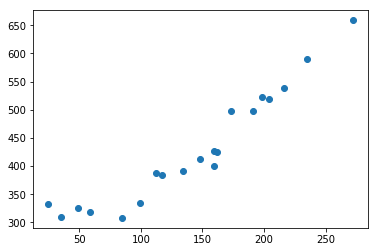

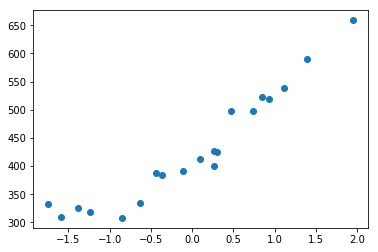

1回目 : theta0 = 9.062,theta1 = 2.795,差分=76155.863248
2回目 : theta0 = 17.464,theta1 = 4.609,差分=73140.091063
3回目 : theta0 = 25.698,theta1 = 6.386,差分=70243.743457
4回目 : theta0 = 33.767,theta1 = 8.128,差分=67462.091216
5回目 : theta0 = 41.675,theta1 = 9.835,差分=64790.592404
6回目 : theta0 = 49.424,theta1 = 11.508,差分=62224.884945
7回目 : theta0 = 57.019,theta1 = 13.147,差分=59760.779501
8回目 : theta0 = 64.461,theta1 = 14.754,差分=57394.252633
9回目 : theta0 = 71.755,theta1 = 16.328,差分=55121.440229
10回目 : theta0 = 78.903,theta1 = 17.871,差分=52938.631195
11回目 : theta0 = 85.908,theta1 = 19.383,差分=50842.261400
12回目 : theta0 = 92.773,theta1 = 20.865,差分=48828.907849
13回目 : theta0 = 99.500,theta1 = 22.318,差分=46895.283098
14回目 : theta0 = 106.093,theta1 = 23.741,差分=45038.229887
15回目 : theta0 = 112.554,theta1 = 25.136,差分=43254.715984
16回目 : theta0 = 118.886,theta1 = 26.502,差分=41541.829231
17回目 : theta0 = 125.092,theta1 = 27.842,差分=39896.772793
18回目 : theta0 = 131.173,theta1 = 29.155,差分=38316.860591
19回目 : theta0 = 137.

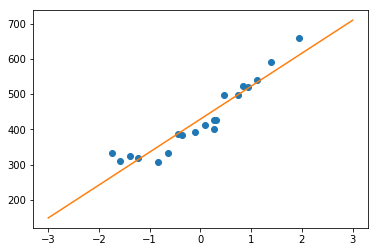

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#学習データを読み込む
train = np.loadtxt('test.csv', delimiter =',', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

#プロット
plt.plot(train_x,train_y,'o')
plt.show()

#パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

#予測関数
def f(x):
    return theta0+theta1 * x
#目的関数
def E(x,y):
    return 0.5 *np.sum((y-f(x))**2)
#標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x -mu) / sigma

train_z = standardize(train_x)

#確認のためのプロット
plt.plot(train_z,train_y,'o')
plt.show()

#学習率
ETA = 1e-3

#誤差の差分
diff = 1

# 更新回数
count = 0

#学習を繰り返す
error = E(train_z,train_y)
while diff >1e-2:
    #更新結果を一時変数に保存
    tmp0 = theta0 - ETA*np.sum((f(train_z)-train_y))
    tmp1 = theta1 - ETA*np.sum((f(train_z)-train_y)*train_z)
    #パラーメタを更新
    theta0 = tmp0
    theta1 = tmp1
    # 全開の誤差との差分を計算
    current_error = E(train_z,train_y)
    diff = error- current_error
    error = current_error
    # ログの出力
    count +=1
    log = '{}回目 : theta0 = {:.3f},theta1 = {:.3f},差分={:4f}'
    print(log.format(count,theta0,theta1,diff))
    
x = np.linspace(-3,3,100)
plt.plot(train_z, train_y,'o')
#上記のパラメータでプロット
plt.plot(x,f(x))
plt.show()

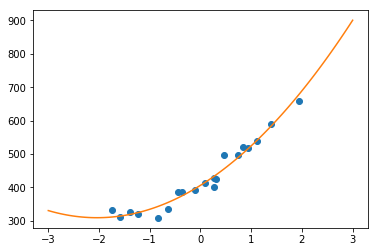

In [20]:
#パラメータを初期化
theta = np.random.rand(3)

def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T

X = to_matrix(train_z)

#予測関数
def f(x):
    return np.dot(x,theta)

#誤差の差分(許容誤差)
diff = 1

#学習を繰り返す
error = E(X,train_y)
while diff >1e-2:
    #パラメータを更新
    theta = theta - ETA*np.dot(f(X) -train_y,X)
    # 前回の誤差との差分を計算
    current_error = E(X,train_y)
    diff = error - current_error
    error = current_error
    
x = np.linspace(-3,3,100)
plt.plot(train_z, train_y,'o')
#上記のパラメータでプロット
plt.plot(x,f(to_matrix(x)))
plt.show()

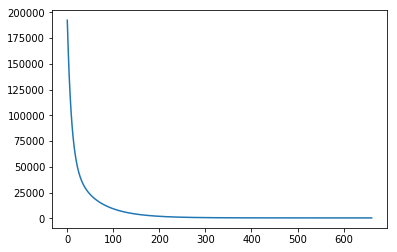

In [21]:
# 平均二乗誤差
def MSE(x,y):
    return (1/ x.shape[0]) * np.sum((y-f(x))**2)
# パラメータをランダムに初期化
theta = np.random.rand(3)
#平均二乗誤差の履歴
errors = []
#誤差の差分
diff = 1
#学習を繰り返す
errors.append(MSE(X,train_y))
while diff>1e-2:
    theta = theta - ETA *np.dot(f(X)-train_y,X)
    errors.append(MSE(X,train_y))
    diff = errors[-2]-errors[-1]
    
#誤差をプロット
x = np.arange(len(errors))

plt.plot(x,errors)
plt.show()

* 確率的勾配降下法の実装
$$
    % 空白は表示に影響しない。コメントは"%"で始める
    % 下付き文字は"_a"、上付き文字は"^a"
    % 改行は"\\"を付ける
    % y_1 = ax^2 \\
    % 複数文字を1要素とする際は{...}で囲う
    % 空白は"\quad"
    %y_2 = ax^{10} \quad y_3 = ax \\
    θ_j = θ_j - η(f_Θ(x^{k})-y^{k})x_j^{k} 
$$

1回目 : theta0 = 9.073,theta1 = 2.128,theta2 = 9.113,差分=14947.413197
2回目 : theta0 = 17.149,theta1 = 3.949,theta2 = 17.303,差分=13523.543387
3回目 : theta0 = 24.894,theta1 = 5.799,theta2 = 24.982,差分=12211.227007
4回目 : theta0 = 32.345,theta1 = 7.594,theta2 = 32.254,差分=11086.069757
5回目 : theta0 = 39.506,theta1 = 9.371,theta2 = 39.028,差分=9995.164975
6回目 : theta0 = 46.407,theta1 = 11.065,theta2 = 45.370,差分=9042.913683
7回目 : theta0 = 53.042,theta1 = 12.748,theta2 = 51.283,差分=8175.766111
8回目 : theta0 = 59.437,theta1 = 14.397,theta2 = 56.832,差分=7424.820525
9回目 : theta0 = 65.591,theta1 = 16.044,theta2 = 62.026,差分=6741.875929
10回目 : theta0 = 71.530,theta1 = 17.666,theta2 = 66.931,差分=6153.592811
11回目 : theta0 = 77.246,theta1 = 19.262,theta2 = 71.432,差分=5553.671381
12回目 : theta0 = 82.767,theta1 = 20.823,theta2 = 75.651,差分=5068.620315
13回目 : theta0 = 88.094,theta1 = 22.366,theta2 = 79.583,差分=4620.917695
14回目 : theta0 = 93.236,theta1 = 23.906,theta2 = 83.241,差分=4219.085113
15回目 : theta0 = 98.209,theta1 = 

480回目 : theta0 = 401.267,theta1 = 95.373,theta2 = 25.829,差分=0.223866
481回目 : theta0 = 401.307,theta1 = 95.370,theta2 = 25.806,差分=0.218405
482回目 : theta0 = 401.347,theta1 = 95.367,theta2 = 25.781,差分=0.218161
483回目 : theta0 = 401.388,theta1 = 95.365,theta2 = 25.761,差分=0.211431
484回目 : theta0 = 401.428,theta1 = 95.363,theta2 = 25.739,差分=0.208016
485回目 : theta0 = 401.468,theta1 = 95.360,theta2 = 25.717,差分=0.204206
486回目 : theta0 = 401.508,theta1 = 95.359,theta2 = 25.697,差分=0.201760
487回目 : theta0 = 401.546,theta1 = 95.357,theta2 = 25.673,差分=0.197687
488回目 : theta0 = 401.583,theta1 = 95.354,theta2 = 25.650,差分=0.194959
489回目 : theta0 = 401.620,theta1 = 95.352,theta2 = 25.626,差分=0.191684
490回目 : theta0 = 401.658,theta1 = 95.348,theta2 = 25.606,差分=0.187748
491回目 : theta0 = 401.696,theta1 = 95.346,theta2 = 25.585,差分=0.186243
492回目 : theta0 = 401.733,theta1 = 95.344,theta2 = 25.562,差分=0.182225
493回目 : theta0 = 401.770,theta1 = 95.341,theta2 = 25.543,差分=0.177709
494回目 : theta0 = 401.808,theta1 = 

736回目 : theta0 = 405.518,theta1 = 95.095,theta2 = 23.402,差分=0.002807
737回目 : theta0 = 405.522,theta1 = 95.094,theta2 = 23.398,差分=0.002712
738回目 : theta0 = 405.526,theta1 = 95.093,theta2 = 23.395,差分=0.002621
739回目 : theta0 = 405.530,theta1 = 95.093,theta2 = 23.392,差分=0.002588
740回目 : theta0 = 405.536,theta1 = 95.093,theta2 = 23.390,差分=0.002579
741回目 : theta0 = 405.538,theta1 = 95.092,theta2 = 23.385,差分=0.002374
742回目 : theta0 = 405.543,theta1 = 95.093,theta2 = 23.383,差分=0.002565
743回目 : theta0 = 405.548,theta1 = 95.093,theta2 = 23.381,差分=0.002511
744回目 : theta0 = 405.550,theta1 = 95.093,theta2 = 23.376,差分=0.002141
745回目 : theta0 = 405.555,theta1 = 95.093,theta2 = 23.375,差分=0.002384
746回目 : theta0 = 405.558,theta1 = 95.093,theta2 = 23.371,差分=0.002121
747回目 : theta0 = 405.562,theta1 = 95.093,theta2 = 23.367,差分=0.002299
748回目 : theta0 = 405.564,theta1 = 95.092,theta2 = 23.362,差分=0.001858
749回目 : theta0 = 405.568,theta1 = 95.092,theta2 = 23.359,差分=0.002247
750回目 : theta0 = 405.574,theta1 = 

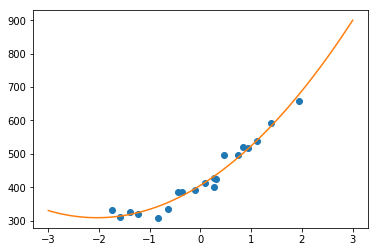

In [31]:
# パラメータをランダムに初期化
theta = np.random.rand(3)

def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T

X = to_matrix(train_z)

#予測関数
def f(x):
    return np.dot(x,theta)

#平均二乗誤差の履歴
errors = []
#誤差の差分
diff = 1

count =0

# 学習を繰り返す
errors.append(MSE(X,train_y))
while diff > 1e-3:
    #学習データを並べ替えるためにランダムな順列を用意する
    p = np.random.permutation(X.shape[0])
    # 学習データをランダムに取り出して確率的勾配降下法でパラメータを更新
    for x,y in zip(X[p,:],train_y[p]):
        theta = theta - ETA *(f(x)-y)*x
    # 全開の誤差との差分を計算
    errors.append(MSE(X,train_y))
    diff = errors[-2]-errors[-1]
    # ログの出力
    count +=1
    log = '{}回目 : theta0 = {:.3f},theta1 = {:.3f},theta2 = {:.3f},差分={:4f}'
    print(log.format(count,theta[0],theta[1],theta[2],diff))
    
x = np.linspace(-3,3,100)
plt.plot(train_z, train_y,'o')
#上記のパラメータでプロット
plt.plot(x,f(to_matrix(x)))
plt.show()